In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime 
import pickle

In [2]:
### load dataset
df_plays=pd.read_csv("/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/plays.csv")

In [3]:
### selecting features
new_df=df_plays[['quarter','down','yardsToGo','playType','personnelO','personnelD','playResult']]

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   quarter     19239 non-null  int64 
 1   down        19239 non-null  int64 
 2   yardsToGo   19239 non-null  int64 
 3   playType    19239 non-null  object
 4   personnelO  19210 non-null  object
 5   personnelD  19210 non-null  object
 6   playResult  19239 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
new_df['personnelD'].replace('', np.nan, inplace=True)
new_df.dropna(subset=['personnelD'], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19210 entries, 0 to 19238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   quarter     19210 non-null  int64 
 1   down        19210 non-null  int64 
 2   yardsToGo   19210 non-null  int64 
 3   playType    19210 non-null  object
 4   personnelO  19210 non-null  object
 5   personnelD  19210 non-null  object
 6   playResult  19210 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33
4,1,3,1,play_type_pass,"2 RB, 3 TE, 0 WR","6 DL, 3 LB, 2 DB",0
...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15


In [7]:
df_personnelO=df_plays.personnelO.value_counts().index[0:10]
df_presonnelD=df_plays.personnelD.value_counts().index[0:10]

In [8]:
### 10 def. that appear the most
new_df=new_df.loc[new_df['personnelD'].isin(df_presonnelD)]

In [9]:
### 10 off. that appear the most

new_df=new_df.loc[new_df['personnelO'].isin(df_personnelO)]

In [10]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4
...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15


In [11]:
### yards at the end of the play
new_df['runs']=new_df['playResult']-new_df['yardsToGo']

In [12]:
### if the team got the first down =1, else 0
new_df.loc[new_df['runs'] > 0, 'Categorical'] = 1
new_df.loc[new_df['runs'] <=0, 'Categorical'] = 0

In [13]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0


In [14]:
new_df['playType'].unique()

array(['play_type_pass', 'play_type_sack', 'play_type_unknown'],
      dtype=object)

In [15]:
new_df[['play_pass','play_sack']] = pd.get_dummies(new_df['playType'])[['play_type_pass','play_type_sack']]

In [16]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,play_sack
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,0


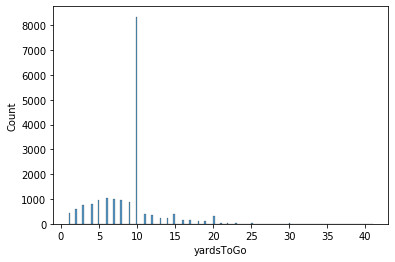

In [17]:
### if the team needs to run 10 yards 
### if the team needs to run less than 10
### if the team needs to run more than 10

sns.histplot(new_df['yardsToGo'])
new_df.loc[new_df['yardsToGo'] == 10, 'yards'] = 'ten_yards_togo'
new_df.loc[new_df['runs'] < 10, 'yards'] = 'less_than_ten_togo'
new_df.loc[new_df['runs'] > 10, 'yards'] = 'more_than_ten_togo'

In [18]:
new_df[['10_yards','less_than_10']] = pd.get_dummies(new_df['yards'])[['ten_yards_togo','less_than_ten_togo']]

In [19]:
new_df.head()

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,play_sack,yards,10_yards,less_than_10
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,0,less_than_ten_togo,0,1
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0,less_than_ten_togo,0,1
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,0,less_than_ten_togo,0,1
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,0,more_than_ten_togo,0,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,0,less_than_ten_togo,0,1


In [20]:
pd.pivot_table(new_df, values='Categorical', 
                       index=['quarter', 'down'],
                       columns=['personnelO'], aggfunc=np.sum)

personnelO    0 RB, 1 TE, 4 WR  1 RB, 0 TE, 4 WR  1 RB, 1 TE, 3 WR  \
quarter down                                                         
1       1                  0.0               7.0             181.0   
        2                  3.0               2.0             233.0   
        3                 10.0              10.0             308.0   
        4                  NaN               0.0               6.0   
2       1                  3.0               5.0             397.0   
        2                  2.0               6.0             399.0   
        3                  9.0               8.0             376.0   
        4                  0.0               3.0              16.0   
3       1                  1.0               0.0             218.0   
        2                  4.0               4.0             264.0   
        3                  5.0              11.0             312.0   
        4                  0.0               NaN              17.0   
4       1                  1.0               3.0             378.0   
        2                  2.0               7.0             448.0   
        3                  4.0              11.0             337.0   
        4                  0.0               2.0              62.0   
5       1                  NaN               NaN              10.0   
        2                  1.0               1.0               7.0   
        3                  NaN               1.0              13.0   
        4                  NaN               NaN               1.0   

personnelO    1 RB, 2 TE, 2 WR  1 RB, 3 TE, 1 WR  2 QB, 1 RB, 1 TE, 2 WR  \
quarter down                                                               
1       1                129.0              25.0                     1.0   
        2                108.0              16.0                     2.0   
        3                 19.0               5.0                     2.0   
        4                  3.0               NaN                     NaN   
2       1                101.0              16.0                     2.0   
        2                 76.0               8.0                     1.0   
        3                 28.0               6.0                     0.0   
        4                  1.0               NaN                     1.0   
3       1                110.0              17.0                     1.0   
        2                104.0              16.0                     2.0   
        3                 28.0               6.0                     1.0   
        4                  1.0               2.0                     NaN   
4       1                 59.0               5.0                     0.0   
        2                 58.0              10.0                     0.0   
        3                 26.0               4.0                     0.0   
        4                  6.0               0.0                     NaN   
5       1                  6.0               0.0                     NaN   
        2                  3.0               0.0                     NaN   
        3                  1.0               0.0                     NaN   
        4                  NaN               1.0                     NaN   

personnelO    2 RB, 0 TE, 3 WR  2 RB, 1 TE, 2 WR  2 RB, 2 TE, 1 WR  \
quarter down                                                         
1       1                  4.0              59.0               8.0   
        2                  1.0              47.0               8.0   
        3                  2.0              10.0               2.0   
        4                  NaN               NaN               NaN   
2       1                  3.0              38.0              11.0   
        2                  6.0              29.0               2.0   
        3                  4.0               7.0               3.0   
        4                  NaN               NaN               NaN   
3       1                  5.0              41.0               4.0   
        2       

In [21]:
pd.pivot_table(new_df, values='Categorical', 
                       index=['quarter', 'down'],
                       columns=['personnelD'], aggfunc=np.sum)

personnelD    1 DL, 4 LB, 6 DB  1 DL, 5 LB, 5 DB  2 DL, 3 LB, 6 DB  \
quarter down                                                         
1       1                  0.0               NaN               5.0   
        2                  0.0               0.0               8.0   
        3                 13.0              12.0              32.0   
        4                  NaN               NaN               2.0   
2       1                 11.0               4.0              23.0   
        2                  5.0               8.0              23.0   
        3                 14.0              18.0              44.0   
        4                  NaN               1.0               1.0   
3       1                  1.0               NaN               6.0   
        2                  1.0               0.0              15.0   
        3                 13.0              13.0              30.0   
        4                  0.0               0.0               1.0   
4       1                  5.0               5.0              20.0   
        2                  8.0               5.0              33.0   
        3                 14.0              12.0              32.0   
        4                  1.0               1.0              11.0   
5       1                  1.0               NaN               3.0   
        2                  0.0               NaN               0.0   
        3                  1.0               1.0               1.0   
        4                  0.0               NaN               NaN   

personnelD    2 DL, 4 LB, 5 DB  3 DL, 2 LB, 6 DB  3 DL, 3 LB, 5 DB  \
quarter down                                                         
1       1                 44.0               0.0              49.0   
        2                 45.0               2.0              64.0   
        3                 31.0              36.0              72.0   
        4                  NaN               NaN               2.0   
2       1                 70.0              17.0              87.0   
        2                 66.0              31.0              93.0   
        3                 41.0              51.0              73.0   
        4                  2.0               2.0               6.0   
3       1                 38.0               3.0              64.0   
        2                 66.0               8.0              76.0   
        3                 36.0              51.0              66.0   
        4                  2.0               1.0               8.0   
4       1                 51.0              26.0              92.0   
        2                 55.0              20.0              97.0   
        3                 37.0              43.0              61.0   
        4                  6.0              12.0              16.0   
5       1                  5.0               0.0               2.0   
        2                  1.0               NaN               6.0   
        3                  1.0               1.0               7.0   
        4                  0.0               NaN               NaN   

personnelD    3 DL, 4 LB, 4 DB  4 DL, 1 LB, 6 DB  4 DL, 2 LB, 5 DB  \
quarter down                                                         
1       1                 48.0               6.0             132.0   
        2                 27.0               6.0             163.0   
        3                  3.0              35.0             124.0   
        4                  NaN               0.0               2.0   
2       1                 35.0              19.0             216.0   
        2                 24.0              33.0             195.0   
        3                  5.0              30.0             153.0   
        4                  0.0               3.0               6.0   
3       1                 35.0               7.0             141.0   
        2                 24.0               9.0             171.0   
        3                  1.0              40.0             115.0   
        

In [22]:
for i in new_df['personnelO'].unique():

    a=len(new_df.loc[new_df['personnelO']==i])
    b=new_df.loc[new_df['personnelO']==i]['Categorical'].sum()
    print("Offense %s used %s resulting in %s first down(%s)" %(i,a,b,(b/a*100)))


Offense 2 RB, 1 TE, 2 WR used 1050 resulting in 346.0 first down(32.95238095238095)
Offense 1 RB, 1 TE, 3 WR used 13378 resulting in 3983.0 first down(29.772761249813122)
Offense 1 RB, 2 TE, 2 WR used 2698 resulting in 867.0 first down(32.13491475166791)
Offense 1 RB, 3 TE, 1 WR used 392 resulting in 137.0 first down(34.94897959183674)
Offense 2 RB, 0 TE, 3 WR used 147 resulting in 47.0 first down(31.97278911564626)
Offense 2 RB, 2 TE, 1 WR used 149 resulting in 49.0 first down(32.88590604026846)
Offense 0 RB, 1 TE, 4 WR used 162 resulting in 45.0 first down(27.77777777777778)
Offense 6 OL, 1 RB, 1 TE, 2 WR used 108 resulting in 36.0 first down(33.33333333333333)
Offense 1 RB, 0 TE, 4 WR used 265 resulting in 81.0 first down(30.566037735849054)
Offense 2 QB, 1 RB, 1 TE, 2 WR used 56 resulting in 13.0 first down(23.214285714285715)


In [23]:
for i in new_df['personnelD'].unique():

    a=len(new_df.loc[new_df['personnelD']==i])
    b=new_df.loc[new_df['personnelD']==i]['Categorical'].sum()
    print("Offense %s used %s allowed  %s first down (%s)" %(i,a,b,(b/a*100)))


Offense 4 DL, 2 LB, 5 DB used 6581 allowed  2007.0 first down (30.496884971888772)
Offense 4 DL, 1 LB, 6 DB used 1081 allowed  285.0 first down (26.364477335800185)
Offense 3 DL, 3 LB, 5 DB used 3084 allowed  941.0 first down (30.512321660181584)
Offense 4 DL, 3 LB, 4 DB used 2329 allowed  769.0 first down (33.01846285959639)
Offense 3 DL, 4 LB, 4 DB used 716 allowed  243.0 first down (33.93854748603352)
Offense 2 DL, 3 LB, 6 DB used 909 allowed  290.0 first down (31.903190319031903)
Offense 2 DL, 4 LB, 5 DB used 2094 allowed  597.0 first down (28.510028653295127)
Offense 3 DL, 2 LB, 6 DB used 1037 allowed  304.0 first down (29.315332690453232)
Offense 1 DL, 5 LB, 5 DB used 265 allowed  80.0 first down (30.18867924528302)
Offense 1 DL, 4 LB, 6 DB used 309 allowed  88.0 first down (28.478964401294498)


In [24]:
new_df.personnelO.unique()


array(['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR',
       '2 QB, 1 RB, 1 TE, 2 WR'], dtype=object)

In [25]:
new_df.personnelD.unique()

array(['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB',
       '1 DL, 4 LB, 6 DB'], dtype=object)

In [26]:
new_df.personnelO.value_counts()

1 RB, 1 TE, 3 WR          13378
1 RB, 2 TE, 2 WR           2698
2 RB, 1 TE, 2 WR           1050
1 RB, 3 TE, 1 WR            392
1 RB, 0 TE, 4 WR            265
0 RB, 1 TE, 4 WR            162
2 RB, 2 TE, 1 WR            149
2 RB, 0 TE, 3 WR            147
6 OL, 1 RB, 1 TE, 2 WR      108
2 QB, 1 RB, 1 TE, 2 WR       56
Name: personnelO, dtype: int64

In [27]:
new_df.personnelD.value_counts()


4 DL, 2 LB, 5 DB    6581
3 DL, 3 LB, 5 DB    3084
4 DL, 3 LB, 4 DB    2329
2 DL, 4 LB, 5 DB    2094
4 DL, 1 LB, 6 DB    1081
3 DL, 2 LB, 6 DB    1037
2 DL, 3 LB, 6 DB     909
3 DL, 4 LB, 4 DB     716
1 DL, 4 LB, 6 DB     309
1 DL, 5 LB, 5 DB     265
Name: personnelD, dtype: int64

In [28]:
new_df[['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR']]= pd.get_dummies(new_df['personnelO'])[['2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR']]

In [29]:
new_df[['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB']]= pd.get_dummies(new_df['personnelD'])[['4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB']]

In [30]:
new_df

,quarter,down,yardsToGo,playType,personnelO,personnelD,playResult,runs,Categorical,play_pass,...,"1 RB, 0 TE, 4 WR","4 DL, 2 LB, 5 DB","4 DL, 1 LB, 6 DB","3 DL, 3 LB, 5 DB","4 DL, 3 LB, 4 DB","3 DL, 4 LB, 4 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 2 LB, 6 DB","1 DL, 5 LB, 5 DB"
0,1,1,15,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",10,-5,0.0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2,10,play_type_pass,"2 RB, 1 TE, 2 WR","4 DL, 2 LB, 5 DB",0,-10,0.0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,3,10,play_type_pass,"1 RB, 1 TE, 3 WR","4 DL, 1 LB, 6 DB",33,23,1.0,1,...,0,0,1,0,0,0,0,0,0,0
5,1,2,8,play_type_pass,"1 RB, 1 TE, 3 WR","3 DL, 3 LB, 5 DB",4,-4,0.0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,3,2,5,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
19235,4,3,7,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",5,-2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
19236,1,3,4,play_type_unknown,"1 RB, 1 TE, 3 WR","1 DL, 5 LB, 5 DB",-10,-14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
19237,2,3,1,play_type_unknown,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",15,14,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
x_df=new_df[['quarter','down','10_yards','less_than_10','play_pass','play_sack','2 RB, 1 TE, 2 WR', '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR',
       '1 RB, 3 TE, 1 WR', '2 RB, 0 TE, 3 WR', '2 RB, 2 TE, 1 WR',
       '0 RB, 1 TE, 4 WR', '6 OL, 1 RB, 1 TE, 2 WR', '1 RB, 0 TE, 4 WR','4 DL, 2 LB, 5 DB', '4 DL, 1 LB, 6 DB', '3 DL, 3 LB, 5 DB',
       '4 DL, 3 LB, 4 DB', '3 DL, 4 LB, 4 DB', '2 DL, 3 LB, 6 DB',
       '2 DL, 4 LB, 5 DB', '3 DL, 2 LB, 6 DB', '1 DL, 5 LB, 5 DB' ]]
y_df=new_df['Categorical']

In [32]:
x_df=x_df.to_numpy()
y_df=y_df.to_numpy()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

In [41]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)
'''
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print("Our model has a ",
      accuracy_score(y_test, pred),
      "% accuracy on the test set with k=",i)
    
    '''
max_neighbors = 25

accs = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0


for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        pred = knn.predict(X_test)
        accs[j,i-1] = accuracy_score(y_test, pred)
        
    j=j+1

    

In [42]:
100*np.mean(accs, axis=0)



array([69.9521947 , 77.0751847 , 75.09778357, 78.09647979, 76.81442851,
       78.46153846, 76.95784442, 78.42242503, 77.84006953, 78.81790526,
       78.24424163, 79.0482399 , 78.78313777, 79.16992612, 78.81355932,
       79.03085615, 78.97001304, 79.05693177, 79.15254237, 79.31768796,
       79.27857453, 79.13081269, 79.29595828, 79.19600174, 79.31768796])

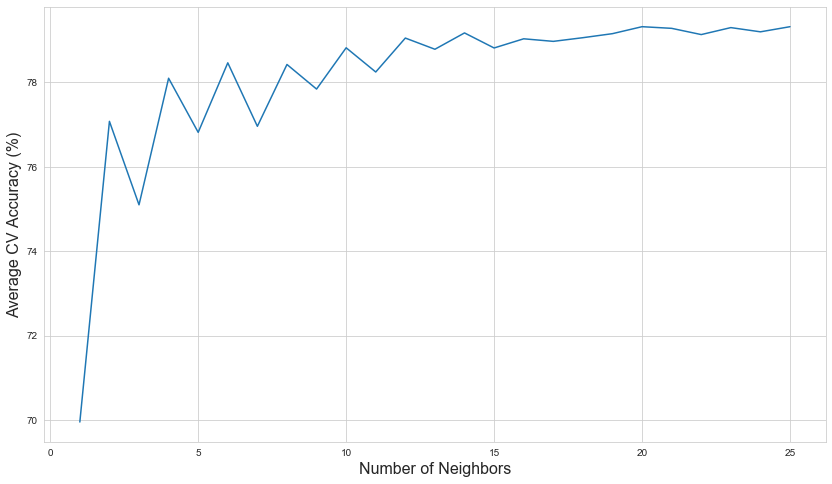

In [43]:
# Plot how the accuracy changes
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0))

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.show()

In [55]:
'''log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred =log_reg.predict(X_test)
accuracy_score(y_test, pred)'''
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)
## Sample Solution
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)

cutoffs = np.arange(0,1,.01)

accs_log = np.zeros((5,len(cutoffs)))

log_reg = LogisticRegression(max_iter=5000)

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    
    
    
    for j in range(len(cutoffs)):
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs_log[i,j] = accuracy_score(y_test, pred)
        
    i=i+1

In [56]:
np.mean(accs_log,axis=0)

array([0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335072,
       0.79335072, 0.79335072, 0.79335072, 0.79335072, 0.79335

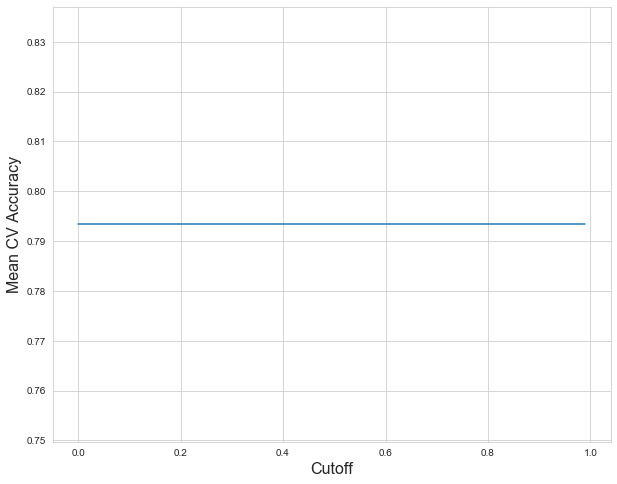

In [57]:
## Sample Solution

plt.figure(figsize=(10,8))


plt.plot(cutoffs,np.mean(accs_log,axis=0))

plt.xlabel("Cutoff", fontsize=16)
plt.ylabel("Mean CV Accuracy", fontsize=16)
plt.show()

In [59]:
'''max_depths=[1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]
for j in range(len(max_depths)):
    rd_cfl=DecisionTreeClassifier(max_depth = max_depths[j], random_state=614)
    rd_cfl.fit(X_train,y_train)
    y_pred=rd_cfl.predict(X_test)
    print("Our model has a ",
  accuracy_score(y_test, pred),
"% accuracy on the test set with depth:",max_depths[j])'''
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
n = 20

accs_dt = np.zeros((5,n))

for j in range(1,n+1):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        print("Treinando modelo %s - %s" %(i,j-1))
        X_train_train, X_train_test = X_train[train_index], X_train[test_index]
        y_train_train, y_train_test = y_train[train_index], y_train[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        accs_dt[i,j-1] = accuracy_score(y_train_test,y_predict)
        i = i + 1

Treinando modelo 0 - 0
Treinando modelo 1 - 0
Treinando modelo 2 - 0
Treinando modelo 3 - 0
Treinando modelo 4 - 0
Treinando modelo 0 - 1
Treinando modelo 1 - 1
Treinando modelo 2 - 1
Treinando modelo 3 - 1
Treinando modelo 4 - 1
Treinando modelo 0 - 2
Treinando modelo 1 - 2
Treinando modelo 2 - 2
Treinando modelo 3 - 2
Treinando modelo 4 - 2
Treinando modelo 0 - 3
Treinando modelo 1 - 3
Treinando modelo 2 - 3
Treinando modelo 3 - 3
Treinando modelo 4 - 3
Treinando modelo 0 - 4
Treinando modelo 1 - 4
Treinando modelo 2 - 4
Treinando modelo 3 - 4
Treinando modelo 4 - 4
Treinando modelo 0 - 5
Treinando modelo 1 - 5
Treinando modelo 2 - 5
Treinando modelo 3 - 5
Treinando modelo 4 - 5
Treinando modelo 0 - 6
Treinando modelo 1 - 6
Treinando modelo 2 - 6
Treinando modelo 3 - 6
Treinando modelo 4 - 6
Treinando modelo 0 - 7
Treinando modelo 1 - 7
Treinando modelo 2 - 7
Treinando modelo 3 - 7
Treinando modelo 4 - 7
Treinando modelo 0 - 8
Treinando modelo 1 - 8
Treinando modelo 2 - 8
Treinando m

In [60]:
np.mean(accs_dt,axis=0)

array([0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80308623, 0.80272386, 0.80098526, 0.80105775, 0.79931901,
       0.79982612, 0.79989856, 0.80026072, 0.79982618, 0.79931903,
       0.79910167, 0.79873938, 0.79852201, 0.79808733, 0.79787   ])

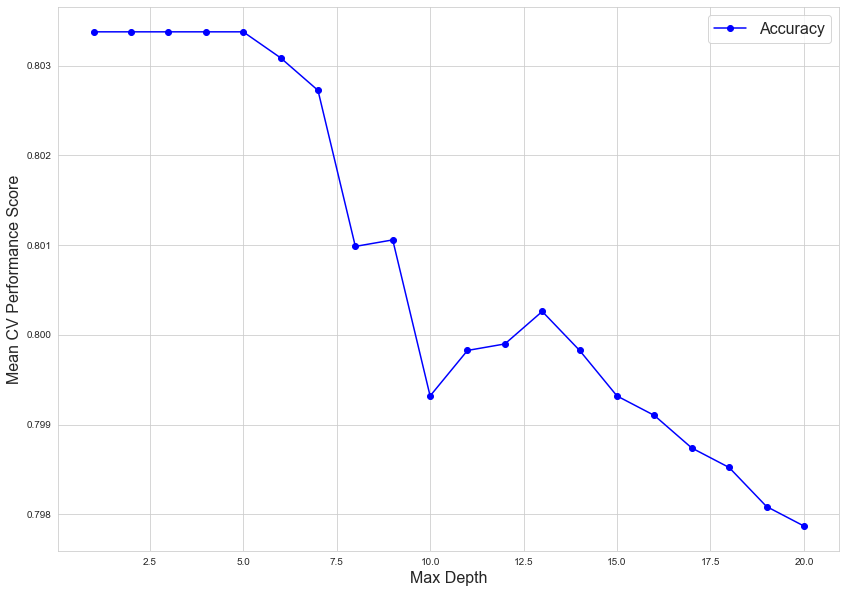

In [61]:
## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs_dt,axis=0),'b-o', label="Accuracy")


plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()


In [64]:
'''max_depths=[1,2,3,4,5,6,7,8,9,10,20,30,50,100,500,1000]
for j in range(len(max_depths)):
    rd_cfl=RandomForestClassifier(max_depth = max_depths[j], random_state=614)
    rd_cfl.fit(X_train,y_train)
    y_pred=rd_cfl.predict(X_test)
    print("Our model has a ",
  accuracy_score(y_test, pred),
"% accuracy on the test set with depth:",max_depths[j])'''

X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)


# n will be the maximum max_depth I consider
n = 50

accs = np.zeros((5,n))


for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        print("Treinando modelo %s - %s" %(i,j-1))
        X_train_train, X_train_test = X_train[train_index], X_train[test_index]
        y_train_train, y_train_test = y_train[train_index], y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        i = i + 1

1
Treinando modelo 0 - 0
Treinando modelo 1 - 0
Treinando modelo 2 - 0
Treinando modelo 3 - 0
Treinando modelo 4 - 0
2
Treinando modelo 0 - 1
Treinando modelo 1 - 1
Treinando modelo 2 - 1
Treinando modelo 3 - 1
Treinando modelo 4 - 1
3
Treinando modelo 0 - 2
Treinando modelo 1 - 2
Treinando modelo 2 - 2
Treinando modelo 3 - 2
Treinando modelo 4 - 2
4
Treinando modelo 0 - 3
Treinando modelo 1 - 3
Treinando modelo 2 - 3
Treinando modelo 3 - 3
Treinando modelo 4 - 3
5
Treinando modelo 0 - 4
Treinando modelo 1 - 4
Treinando modelo 2 - 4
Treinando modelo 3 - 4
Treinando modelo 4 - 4
6
Treinando modelo 0 - 5
Treinando modelo 1 - 5
Treinando modelo 2 - 5
Treinando modelo 3 - 5
Treinando modelo 4 - 5
7
Treinando modelo 0 - 6
Treinando modelo 1 - 6
Treinando modelo 2 - 6
Treinando modelo 3 - 6
Treinando modelo 4 - 6
8
Treinando modelo 0 - 7
Treinando modelo 1 - 7
Treinando modelo 2 - 7
Treinando modelo 3 - 7
Treinando modelo 4 - 7
9
Treinando modelo 0 - 8
Treinando modelo 1 - 8
Treinando modelo

In [67]:
np.mean(accs,axis=0)

array([0.70057223, 0.80040599, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80323113,
       0.80308626, 0.80279638, 0.80207187, 0.80105767, 0.79960878,
       0.79917411, 0.79859455, 0.7983047 , 0.7980149 , 0.79830473,
       0.79779753, 0.79729047, 0.7972905 , 0.79700059, 0.79685577,
       0.79692818, 0.7970731 , 0.79714549, 0.79729042, 0.79729042,
       0.79729042, 0.79729042, 0.79729042, 0.79729042, 0.79729042,
       0.79729042, 0.79729042, 0.79729042, 0.79729042, 0.79729042,
       0.79729042, 0.79729042, 0.79729042, 0.79729042, 0.79729042,
       0.79729042, 0.79729042, 0.79729042, 0.79729042, 0.79729042])

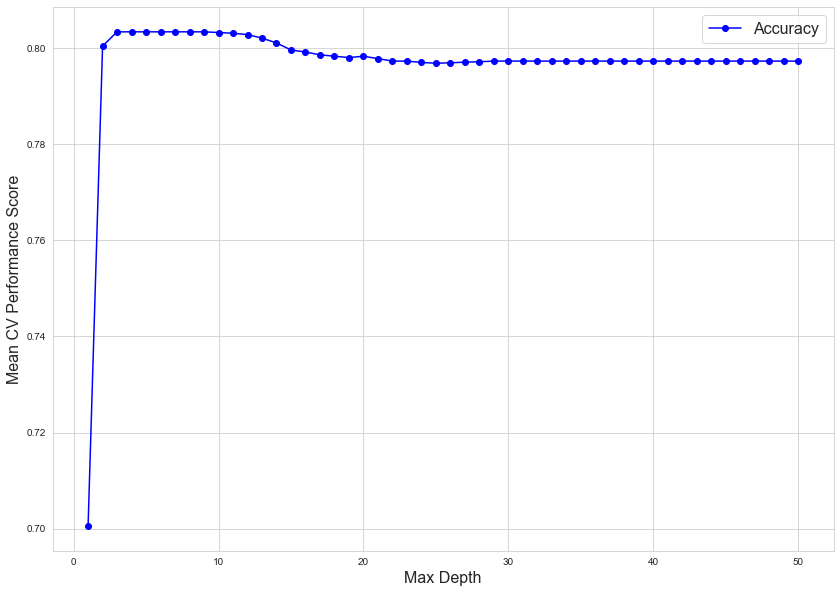

In [68]:
## Plot that mean cv measure against max_depth

## Sample Answer
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [70]:
'''clf = svm.SVC()
clf.fit(X_train,y_train)
pred =clf.predict(X_test)
print("Our model has a ",
  np.round(sum(pred == y_test)/len(y_test)*100,2),
  "% accuracy on the training set with ")'''
from sklearn.svm import LinearSVC

X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

kfold = StratifiedKFold(5,shuffle=True,random_state = 440)

Cs = np.linspace(0.1,10,50) 

accs_svm = np.zeros((5,len(Cs)))

for j in range(len(Cs)):
    C = Cs[j]
    
    pipe = LinearSVC(C=C,loss="hinge",max_iter=200000)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        print("Modelo %s - %s" %(i,j))
        X_train_train,X_train_test = X_train[train_index,:],X_train[test_index,:]
        y_train_train,y_train_test = y_train[train_index],y_train[test_index]

        pipe_clone = clone(pipe)
        
        pipe_clone.fit(X_train_train,y_train_train)

        pred = pipe_clone.predict(X_train_test)
        
        accs_svm[i,j] = accuracy_score(y_train_test,pred)

        i = i + 1


Modelo 0 - 0
Modelo 1 - 0
Modelo 2 - 0
Modelo 3 - 0
Modelo 4 - 0
Modelo 0 - 1
Modelo 1 - 1
Modelo 2 - 1
Modelo 3 - 1
Modelo 4 - 1
Modelo 0 - 2
Modelo 1 - 2
Modelo 2 - 2
Modelo 3 - 2
Modelo 4 - 2
Modelo 0 - 3
Modelo 1 - 3
Modelo 2 - 3
Modelo 3 - 3
Modelo 4 - 3
Modelo 0 - 4
Modelo 1 - 4
Modelo 2 - 4
Modelo 3 - 4
Modelo 4 - 4
Modelo 0 - 5
Modelo 1 - 5
Modelo 2 - 5
Modelo 3 - 5
Modelo 4 - 5
Modelo 0 - 6
Modelo 1 - 6
Modelo 2 - 6
Modelo 3 - 6
Modelo 4 - 6
Modelo 0 - 7
Modelo 1 - 7
Modelo 2 - 7
Modelo 3 - 7
Modelo 4 - 7
Modelo 0 - 8
Modelo 1 - 8
Modelo 2 - 8
Modelo 3 - 8
Modelo 4 - 8
Modelo 0 - 9
Modelo 1 - 9
Modelo 2 - 9
Modelo 3 - 9
Modelo 4 - 9
Modelo 0 - 10
Modelo 1 - 10
Modelo 2 - 10
Modelo 3 - 10
Modelo 4 - 10
Modelo 0 - 11
Modelo 1 - 11
Modelo 2 - 11
Modelo 3 - 11
Modelo 4 - 11
Modelo 0 - 12
Modelo 1 - 12
Modelo 2 - 12
Modelo 3 - 12
Modelo 4 - 12
Modelo 0 - 13
Modelo 1 - 13
Modelo 2 - 13
Modelo 3 - 13
Modelo 4 - 13
Modelo 0 - 14
Modelo 1 - 14
Modelo 2 - 14
Modelo 3 - 14
Modelo 4 - 14


In [71]:
np.mean(accs_svm,axis=0)

array([0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603,
       0.80337603, 0.80337603, 0.80337603, 0.80337603, 0.80337603])

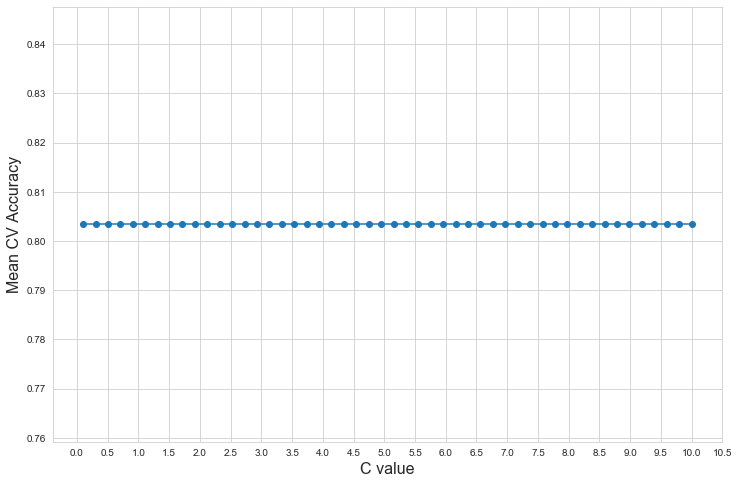

In [72]:
plt.figure(figsize=(12,8))

plt.plot(Cs, np.mean(accs_svm,axis=0), '-o')

plt.xticks(np.arange(0,11,.5))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Mean CV Accuracy", fontsize=16)

plt.show()

In [73]:
'''svc = svm.SVC(kernel = "sigmoid", coef0 = 1)

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("Our model has a ",
  np.round(sum(pred == y_test)/len(y_test)*100,2),
  "% accuracy on the test set with ")
'''
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y_df)

kfold = StratifiedKFold(5,shuffle=True,random_state = 440)

Cs = np.linspace(0.1,10,50) 

accs_svm = np.zeros((5,len(Cs)))

for j in range(len(Cs)):
    C = Cs[j]
    
    pipe =svm.SVC(C=C,kernel = "sigmoid", coef0 = 1)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        print("Modelo %s - %s" %(i,j))
        X_train_train,X_train_test = X_train[train_index,:],X_train[test_index,:]
        y_train_train,y_train_test = y_train[train_index],y_train[test_index]

        pipe_clone = clone(pipe)
        
        pipe_clone.fit(X_train_train,y_train_train)

        pred = pipe_clone.predict(X_train_test)
        
        accs_svm[i,j] = accuracy_score(y_train_test,pred)

        i = i + 1


Modelo 0 - 0
Modelo 1 - 0
Modelo 2 - 0
Modelo 3 - 0
Modelo 4 - 0
Modelo 0 - 1
Modelo 1 - 1
Modelo 2 - 1
Modelo 3 - 1
Modelo 4 - 1
Modelo 0 - 2
Modelo 1 - 2
Modelo 2 - 2
Modelo 3 - 2
Modelo 4 - 2
Modelo 0 - 3
Modelo 1 - 3
Modelo 2 - 3
Modelo 3 - 3
Modelo 4 - 3
Modelo 0 - 4
Modelo 1 - 4
Modelo 2 - 4
Modelo 3 - 4
Modelo 4 - 4
Modelo 0 - 5
Modelo 1 - 5
Modelo 2 - 5
Modelo 3 - 5
Modelo 4 - 5
Modelo 0 - 6
Modelo 1 - 6
Modelo 2 - 6
Modelo 3 - 6
Modelo 4 - 6
Modelo 0 - 7
Modelo 1 - 7
Modelo 2 - 7
Modelo 3 - 7
Modelo 4 - 7
Modelo 0 - 8
Modelo 1 - 8
Modelo 2 - 8
Modelo 3 - 8
Modelo 4 - 8
Modelo 0 - 9
Modelo 1 - 9
Modelo 2 - 9
Modelo 3 - 9
Modelo 4 - 9
Modelo 0 - 10
Modelo 1 - 10
Modelo 2 - 10
Modelo 3 - 10
Modelo 4 - 10
Modelo 0 - 11
Modelo 1 - 11
Modelo 2 - 11
Modelo 3 - 11
Modelo 4 - 11
Modelo 0 - 12
Modelo 1 - 12
Modelo 2 - 12
Modelo 3 - 12
Modelo 4 - 12
Modelo 0 - 13
Modelo 1 - 13
Modelo 2 - 13
Modelo 3 - 13
Modelo 4 - 13
Modelo 0 - 14
Modelo 1 - 14
Modelo 2 - 14
Modelo 3 - 14
Modelo 4 - 14


In [74]:
np.mean(accs_svm,axis=0)

array([0.65586796, 0.64847865, 0.6191382 , 0.61399498, 0.61145956,
       0.60863424, 0.6063881 , 0.60609811, 0.60334493, 0.60435898,
       0.60392433, 0.60247555, 0.60218583, 0.60160625, 0.60218575,
       0.60211339, 0.60175128, 0.60175128, 0.60211347, 0.60211347,
       0.60211347, 0.60211347, 0.60109898, 0.60109898, 0.60109898,
       0.60109898, 0.60109898, 0.60225848, 0.60233091, 0.60182385,
       0.60160654, 0.60175144, 0.60131681, 0.60131681, 0.60131681,
       0.60131681, 0.60131681, 0.60131681, 0.60131681, 0.60131681,
       0.60131681, 0.60138928, 0.60175147, 0.60175147, 0.60175147,
       0.60175147, 0.60175147, 0.60175147, 0.60175147, 0.60175147])

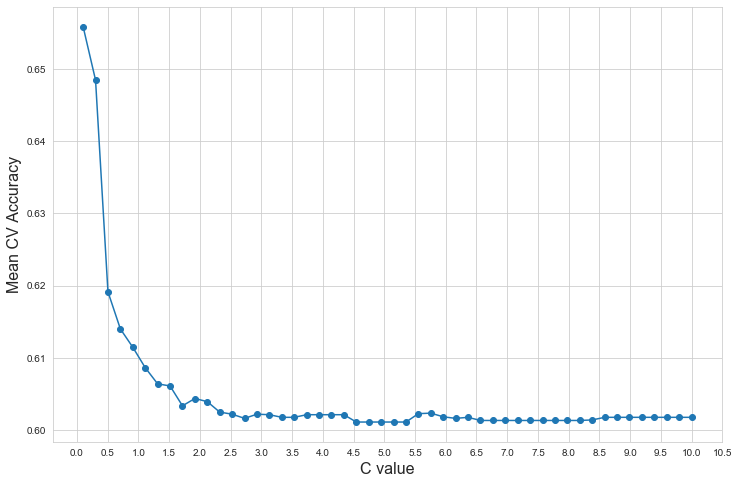

In [75]:
plt.figure(figsize=(12,8))

plt.plot(Cs, np.mean(accs_svm,axis=0), '-o')

plt.xticks(np.arange(0,11,.5))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Mean CV Accuracy", fontsize=16)

plt.show()

In [76]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                [('lr',LogisticRegression()),
                ('rf',RandomForestClassifier()),
                ('svm',svm.SVC()),
                ('knn',KNeighborsClassifier())],
                voting = "hard")

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)
sum(y_test == y_pred)/len(y_pred)

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8055193394176445

In [77]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(svm.SVC(),
                            bootstrap = True)

paste_clf = BaggingClassifier(svm.SVC(),
                            bootstrap = False )

In [78]:
# Fit Bagged Data
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Bagging Accuracy", np.round(acc,5))

## Fit Paste Data
paste_clf.fit(X_train,y_train)
y_pred = paste_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Pasting Accuracy", np.round(acc,5))

Bagging Accuracy 0.80552
Pasting Accuracy 0.80552


In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(x_df)

In [84]:
len(kmeans.labels_)

18405

In [85]:
new_df['Categorical'].to_numpy()

array([0., 0., 0., ..., 0., 1., 0.])

In [86]:
acc = sum(new_df['Categorical'].to_numpy() == kmeans.labels_)/len(kmeans.labels_)
acc

0.4945938603640315